# CLIPasso: Semantically-Aware Object Sketching

# (1) Choose your image

You can upload your own target image to sketch, please place it under "CLIPasso/target_images/".



Image name: camel.png


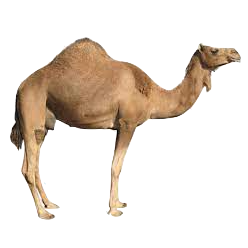

In [1]:
from IPython.display import Image as Image_colab
from IPython.display import display
from PIL import Image
import os

target_image = input("Image name:")
abs_path = os.path.abspath(os.getcwd())
target_ = f"{abs_path}/target_images/{target_image}"
img_ = Image_colab(target_)
display(img_)

# (2) Start Sketching 🎨

This stage will take a few minutes.

We provide a few input examples under "CLIPasso/target_images". 
<br>You can sketch your own input by simply placing the desired image in "CLIPasso/target_images" and specifying the image name under "target_image".

**A few notes:**<br>

*   It is recommended to use images without a background, however, if your image contains a background, you can mask it out by using inserting 1 to "**mask_object**" field below.
*   If your image is not squared, it might be cut off. In that case it is recommended to fill the "**fix_scale**" field with 1 to automatically fix the scale.
*   You can define the abstraction level by using the "**num_strokes**" parameter. This parameter defines the number of strokes used to create the sketch. For example, optional values can be 32, 16, 8 and even 4.

You can download the resulting sketch in SVG format from CLIPasso/output_sketches/\<target_image_name\>/best_iter.svg

Processing [camel.png] ...


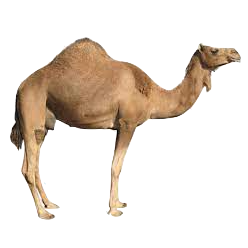

GPU: True, 0


In [8]:
import torch
gpunum=4

os.environ["CUDA_VISIBLE_DEVICES"] = ','.join(["4"])
print("=" * 50)
print(f"Processing [{target_image}] ...")
img_ = Image_colab(target_)
display(img_)
print(f"GPU: {torch.cuda.is_available()}, {torch.cuda.current_device()}")
print("=" * 50)

IntProgress(value=2000, bar_style='info', description='Processing:', max=2001, style=ProgressStyle(bar_color='…

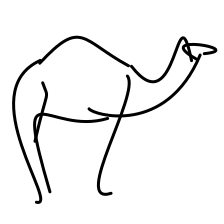

In [9]:
mask_object = 0
fix_scale = 0
num_strokes = input("number of strokes:")

%run run_object_sketching.py --target_file $target_image --num_sketches 2 \
            --mask_object $mask_object --fix_scale $fix_scale --num_strokes $num_strokes --multiprocess 1 --num_iter 2001 \
            -display --gpunum $gpunum

# (3) Display Final Result

/home/vinker/live_demo/github_version/CLIPasso


Image name: camel.png
number of strokes: 8


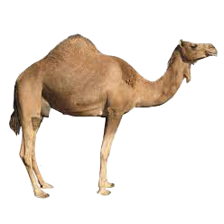

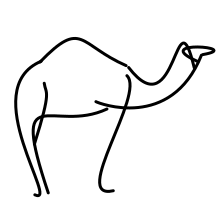

You can download the result sketch from /home/vinker/live_demo/github_version/CLIPasso/output_sketches/camel/camel_8strokes_seed0/final_sketch.png
/home/vinker/live_demo/github_version/CLIPasso/output_sketches/camel/camel_8strokes_seed0


In [5]:
target_image = input("Image name:")
num_strokes = input("number of strokes:")
%run display_results.py --target_file $target_image --num_strokes $num_strokes

In [6]:
%cd /content/CLIPasso/

import re
import os
import subprocess as sp
import moviepy.editor as mvp
from IPython.display import clear_output

target_image = "camel.png" #@param {"type": "string"}

abs_path = os.path.abspath(os.getcwd())
result_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}"
svg_files = os.listdir(result_path)
svg_files = [f for f in svg_files if "best.svg" in f and f"{num_strokes}strokes" in f]

p = re.compile("_best")
best_sketch_dir = ""
for m in p.finditer(svg_files[0]):
    best_sketch_dir += svg_files[0][0: m.start()]

cur_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}/{best_sketch_dir}"
sp.run(["ffmpeg", "-y", "-framerate", "10", "-pattern_type", "glob", "-i", 
            f"{cur_path}/svg_to_png/iter_*.png", "-vb", "20M", f"{cur_path}/sketch.mp4"])

sp.run(["ffmpeg", "-y", "-i", f"{cur_path}/sketch.mp4", "-filter_complex",
    "[0]trim=0:2[hold];[0][hold]concat[extended];[extended][0]overlay",
    f"{cur_path}/sketch_longer.mp4"])

clear_output()
# display(img_)
display(mvp.ipython_display(f"{cur_path}/sketch_longer.mp4"))